## Imports

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
card_data = pd.read_csv("cards.csv")
card_data = card_data.reindex(columns=['hp', 'damage','converted_energy_cost','converted_retreat_cost','resistance','weakness', 'age', 'pokedex_nr','average_price','type'])


In [4]:
card_data.head()

,hp,damage,converted_energy_cost,converted_retreat_cost,resistance,weakness,age,pokedex_nr,average_price,type
0,140,50,3.5,4,160,280,4949,306,2.03,9
1,50,0,0.0,1,50,100,3395,13,0.04,7
2,130,50,2.5,2,150,160,5579,181,1.88,8
3,130,70,3.0,3,150,160,6047,181,1.87,8
4,60,0,0.0,1,60,120,1874,1,0.32,7


In [5]:
card_data.describe()

,hp,damage,converted_energy_cost,converted_retreat_cost,resistance,weakness,age,pokedex_nr,average_price,type
count,13776.00000,13776.000000,13776.000000,13776.000000,13776.000000,13776.000000,13776.000000,13776.000000,13776.000000,13776.000000
mean,105.88705,41.937936,1.789961,1.700131,112.680749,204.989111,3547.878557,378.654907,6.813584,6.640316
std,61.44678,40.384437,0.956605,0.866067,62.252399,124.347326,2606.751842,273.277237,54.772245,3.318898
min,30.00000,0.000000,0.000000,1.000000,30.000000,30.000000,61.000000,1.000000,0.000000,1.000000
25%,60.00000,15.000000,1.000000,1.000000,70.000000,120.000000,1286.000000,139.000000,0.100000,5.000000
50%,90.00000,30.000000,2.000000,1.000000,90.000000,160.000000,2942.000000,329.000000,0.480000,7.000000
75%,130.00000,60.000000,2.500000,2.000000,140.000000,260.000000,5681.000000,594.000000,2.940000,10.000000
max,340.00000,300.000000,5.000000,5.000000,370.000000,680.000000,9265.000000,1010.000000,5190.000000,11.000000


In [6]:
data_corr = card_data[['hp', 'damage','converted_energy_cost','converted_retreat_cost','resistance','weakness', 'age', 'pokedex_nr','average_price','type']].corr()
data_corr

,hp,damage,converted_energy_cost,converted_retreat_cost,resistance,weakness,age,pokedex_nr,average_price,type
hp,1.000000,0.719905,0.408882,0.492753,0.983856,0.978082,-0.412545,0.239925,0.055309,-0.026157
damage,0.719905,1.000000,0.681112,0.468600,0.705742,0.707828,-0.350113,0.207630,0.036831,-0.047515
converted_energy_cost,0.408882,0.681112,1.000000,0.498888,0.403746,0.403936,-0.041353,0.056260,0.050764,-0.036011
converted_retreat_cost,0.492753,0.468600,0.498888,1.000000,0.480417,0.483184,-0.148487,0.106761,0.031305,-0.011185
resistance,0.983856,0.705742,0.403746,0.480417,1.000000,0.962361,-0.397273,0.240866,0.059290,-0.033182
weakness,0.978082,0.707828,0.403936,0.483184,0.962361,1.000000,-0.429960,0.241003,0.053943,-0.013534
age,-0.412545,-0.350113,-0.041353,-0.148487,-0.397273,-0.429960,1.000000,-0.447029,0.070902,0.029089
pokedex_nr,0.239925,0.207630,0.056260,0.106761,0.240866,0.241003,-0.447029,1.000000,-0.054663,-0.008061
average_price,0.055309,0.036831,0.050764,0.031305,0.059290,0.053943,0.070902,-0.054663,1.000000,-0.021854
type,-0.026157,-0.047515,-0.036011,-0.011185,-0.033182,-0.013534,0.029089,-0.008061,-0.021854,1.000000


In [7]:
for column in card_data[['hp', 'damage','converted_energy_cost','converted_retreat_cost','resistance','weakness', 'age', 'pokedex_nr','average_price','type']]:
    stats = card_data[column]
    stat, p = shapiro(stats)
    print(column,'Statistics=%.3f, p=%.15f' % (stat, p))
    # reject H0 (data is normally distributed) if p < 0.05

hp Statistics=0.838, p=0.000000000000000
damage Statistics=0.824, p=0.000000000000000
converted_energy_cost Statistics=0.962, p=0.000000000000000
converted_retreat_cost Statistics=0.761, p=0.000000000000000
resistance Statistics=0.857, p=0.000000000000000
weakness Statistics=0.851, p=0.000000000000000
age Statistics=0.926, p=0.000000000000000
pokedex_nr Statistics=0.938, p=0.000000000000000
average_price Statistics=0.071, p=0.000000000000000
type Statistics=0.911, p=0.000000000000000


c:\Users\Raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13776.
  res = hypotest_fun_out(*samples, **kwds)


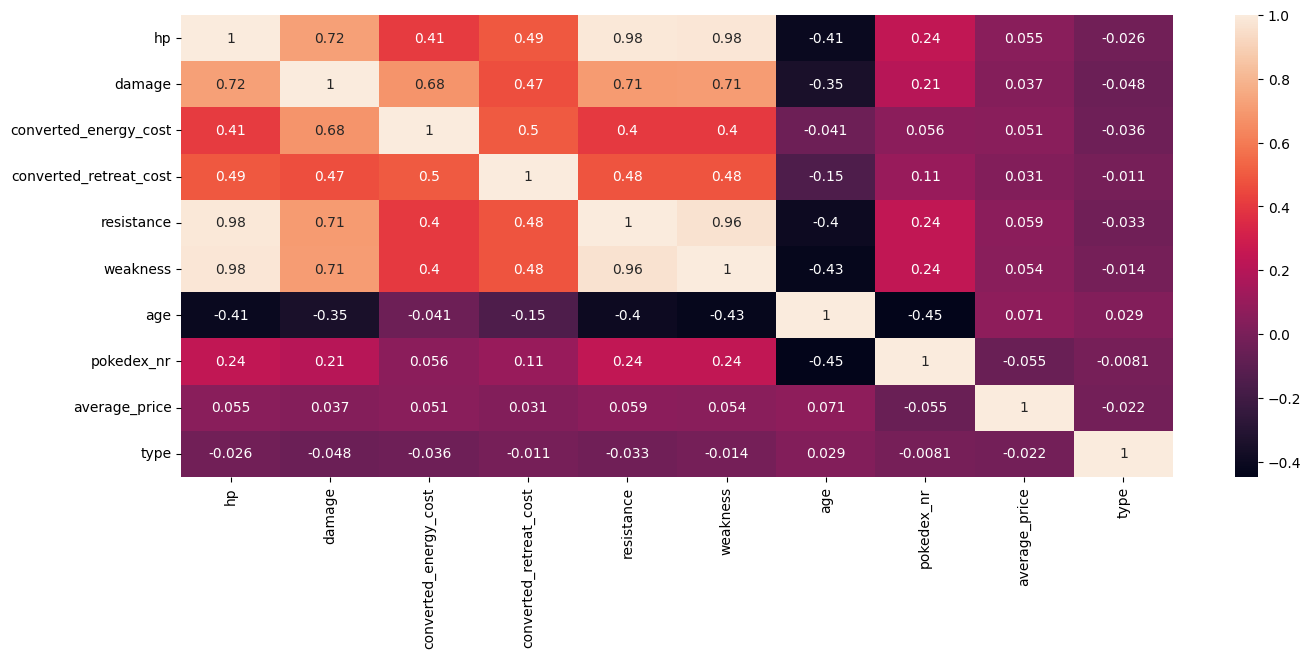

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_corr, annot=True)

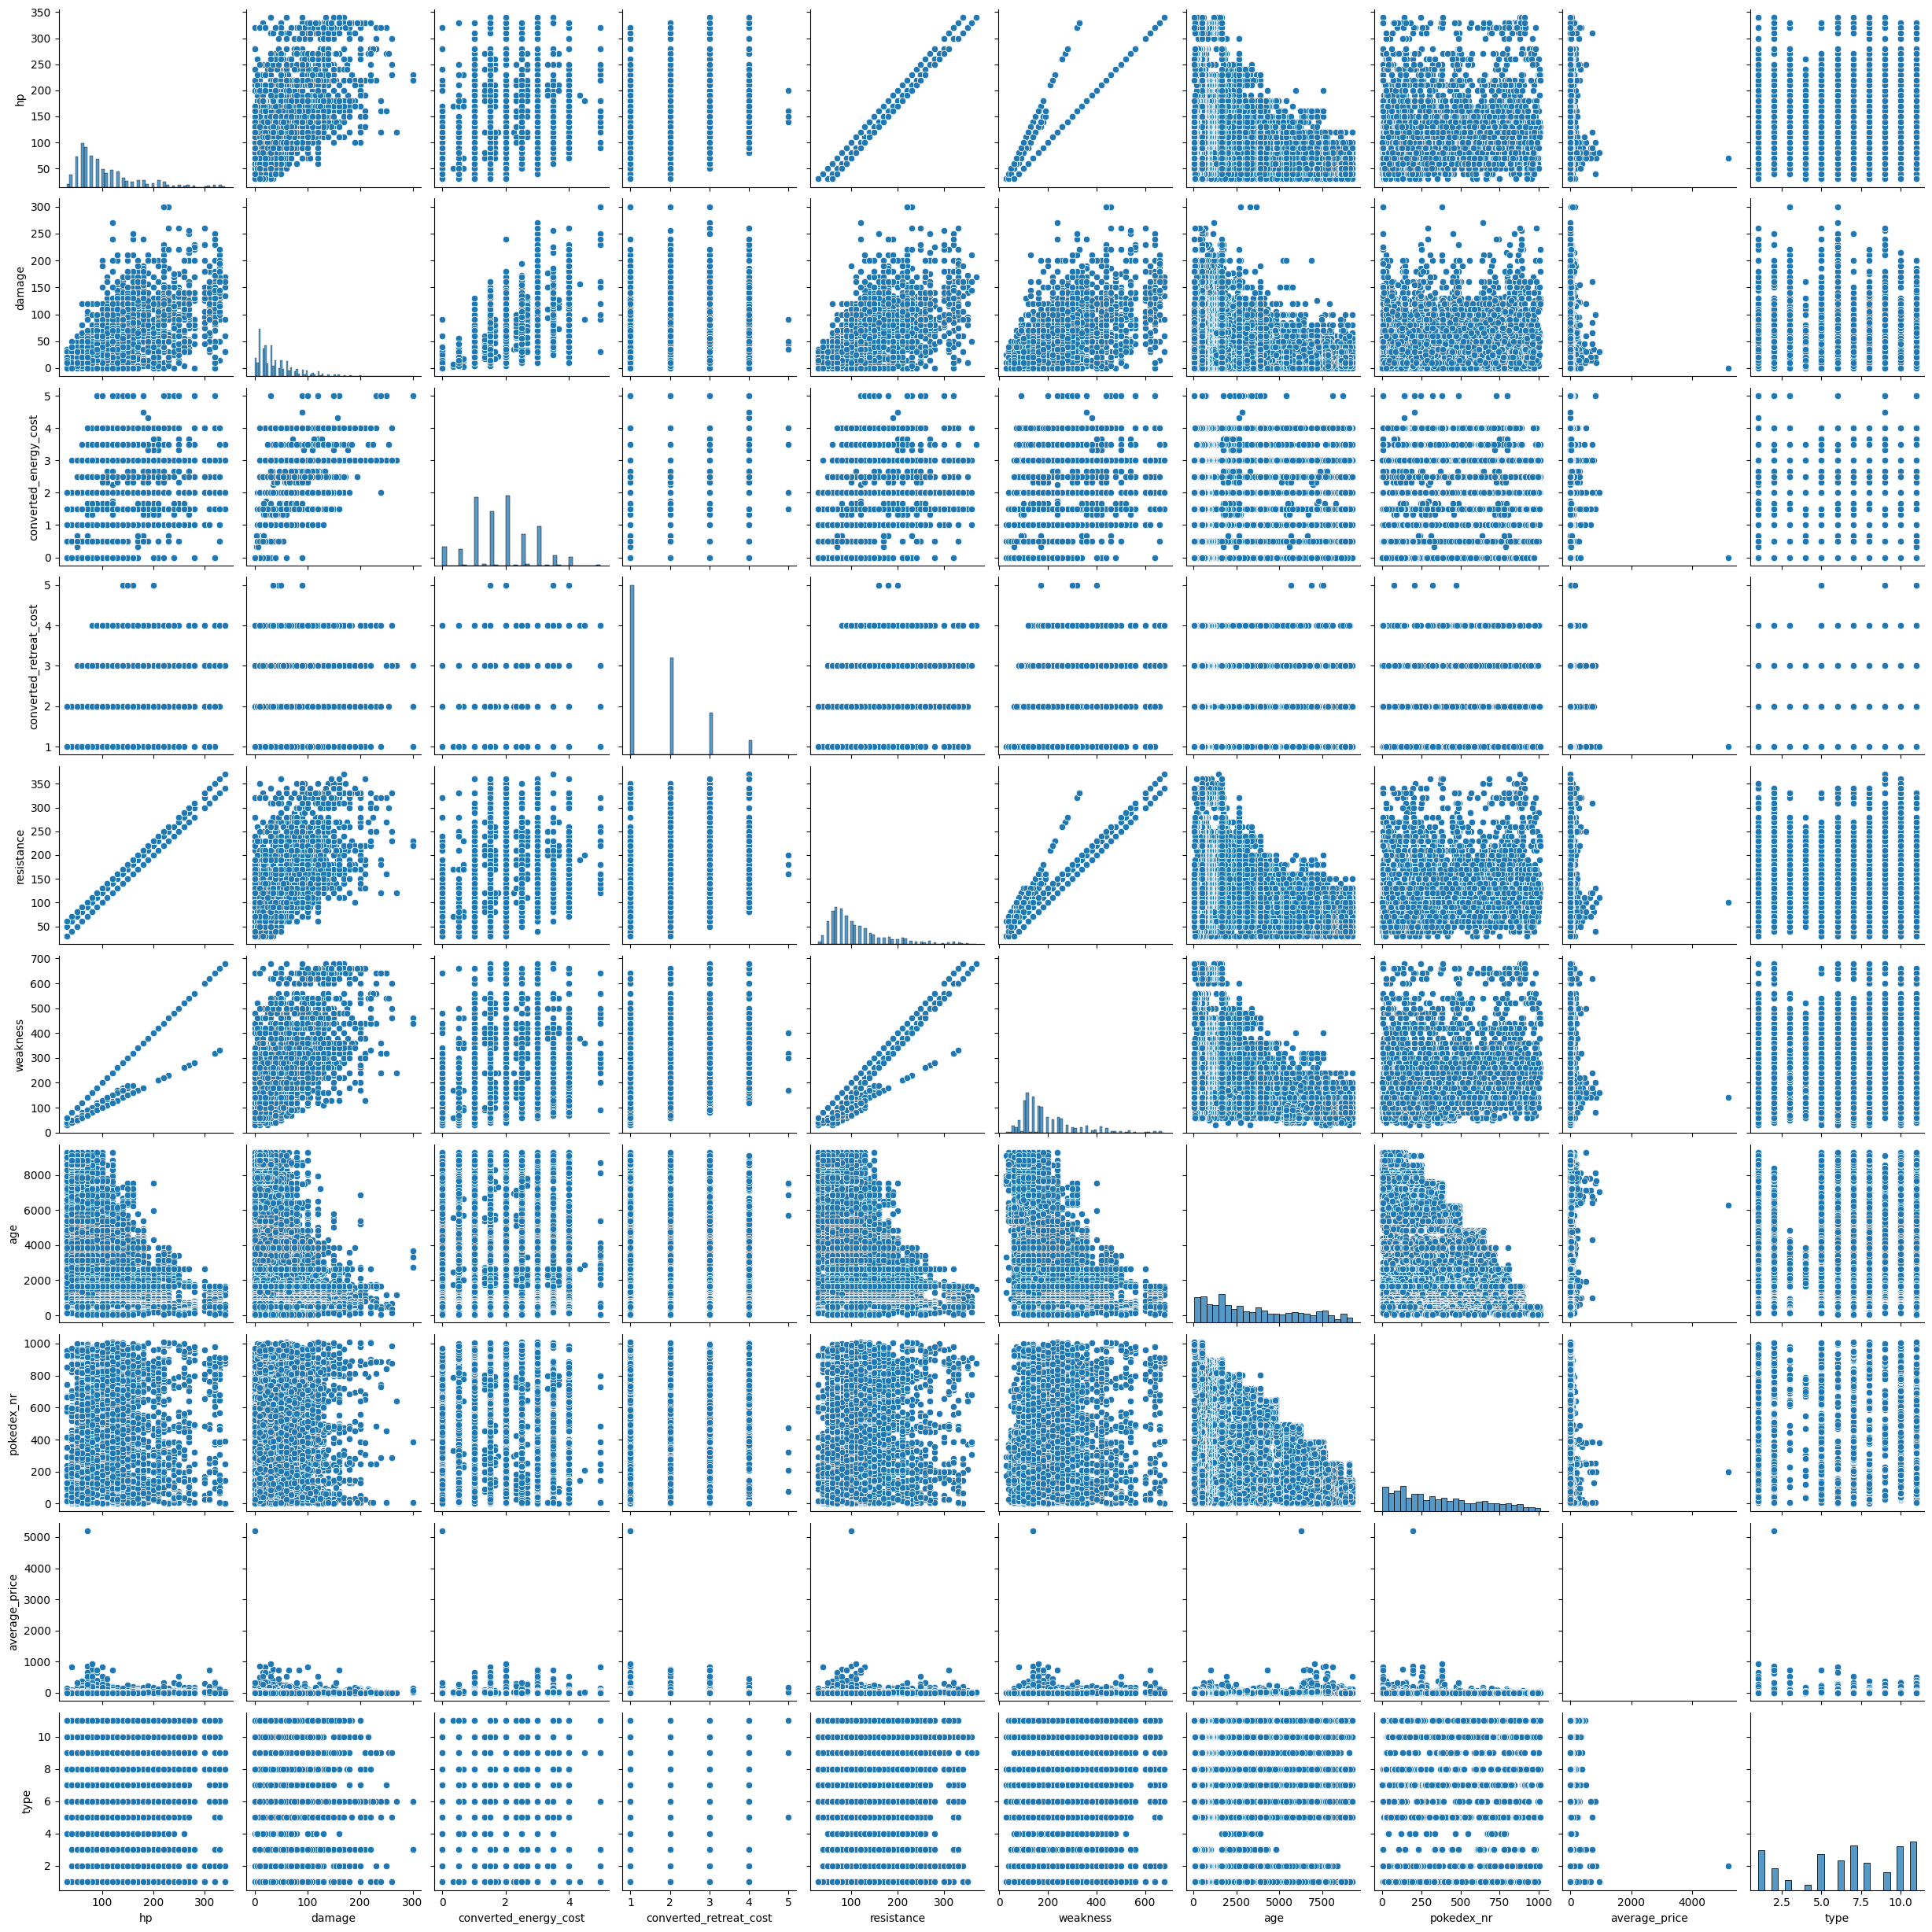

In [8]:
sns.pairplot(card_data)
plt.show()

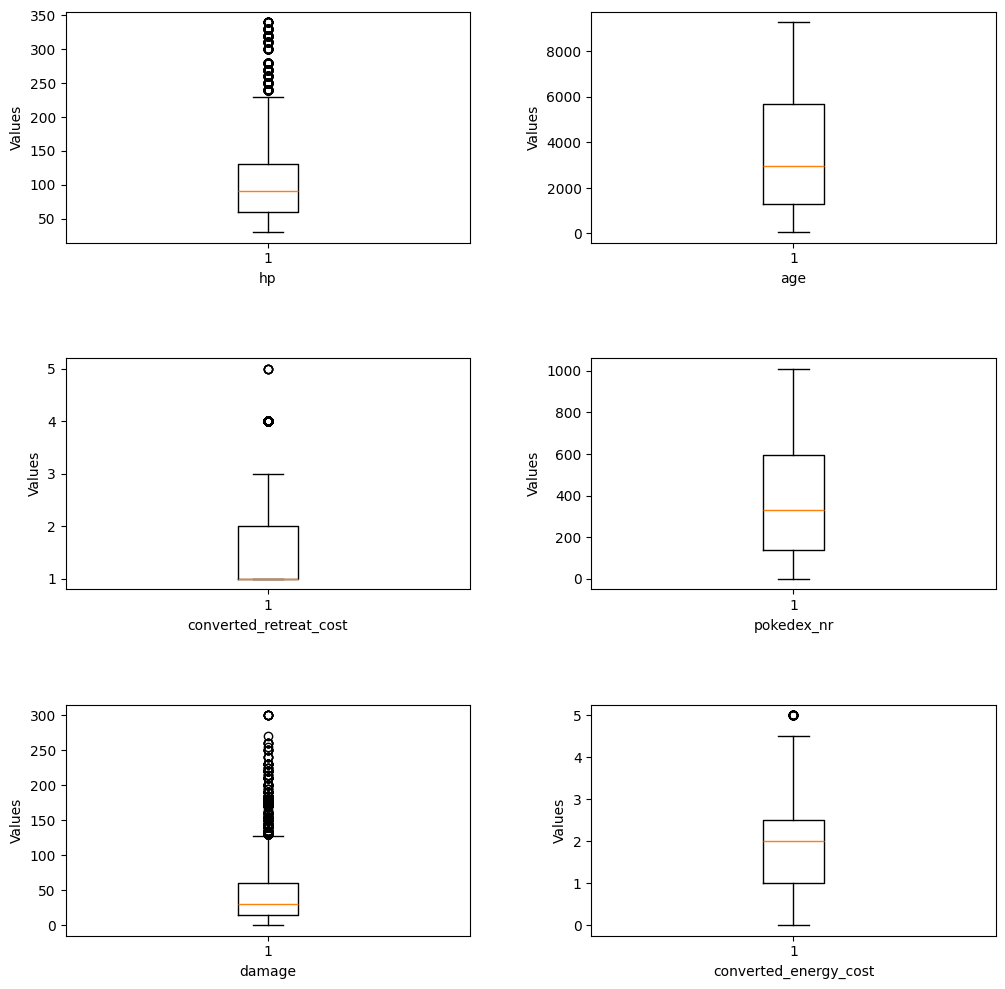

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

columns = ['hp', 'age', 'converted_retreat_cost', 'pokedex_nr', 'damage', 'converted_energy_cost']

for ax, column in zip(axes.flatten(), columns):
    ax.boxplot(card_data[column])
    ax.set_xlabel(column)
    ax.set_ylabel('Values')

plt.show()

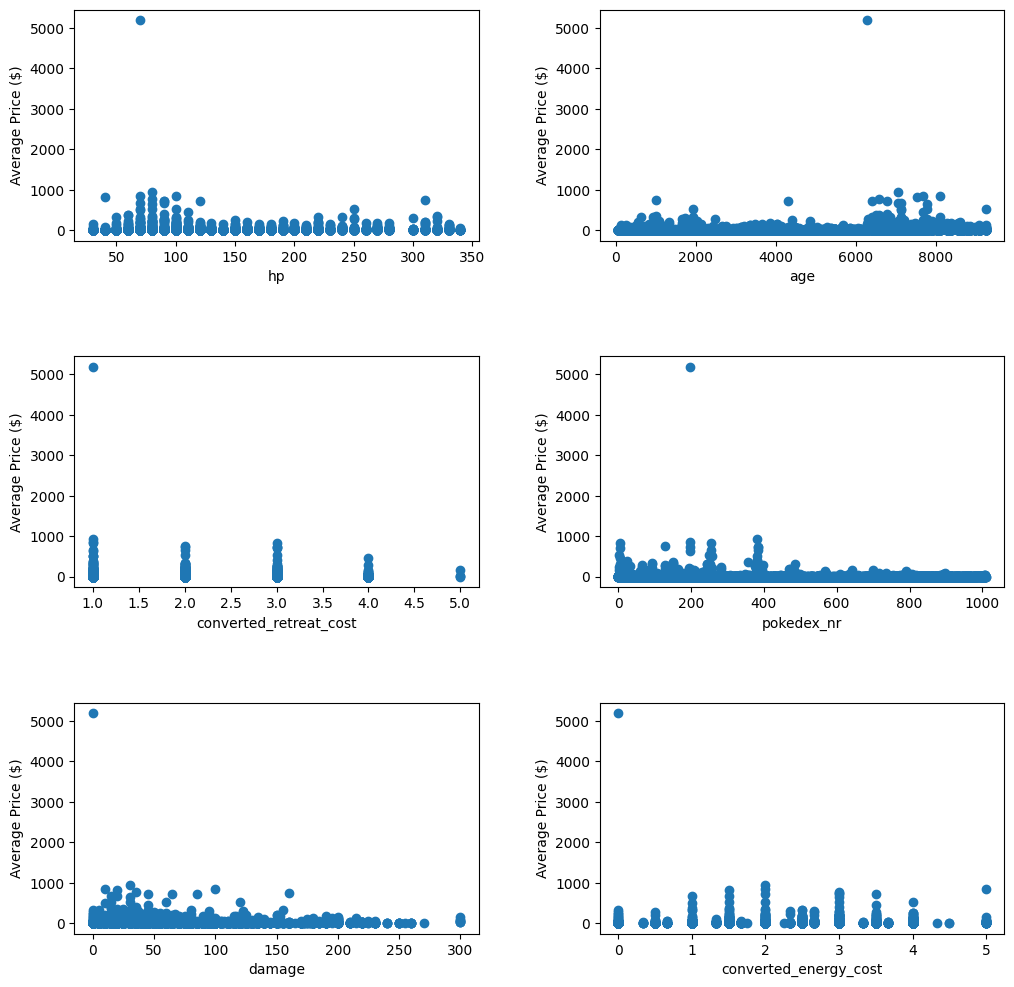

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

columns = ['hp', 'age', 'converted_retreat_cost', 'pokedex_nr', 'damage', 'converted_energy_cost']

for ax, column in zip(axes.flatten(), columns):
    ax.scatter(card_data[column], card_data['average_price'])
    ax.set_xlabel(column)
    ax.set_ylabel('Average Price ($)')

plt.show()

In [12]:
# Define price ranges
bins = [0, 10, 20, float('inf')]
labels = ['low', 'medium', 'high']

# Create a new column 'price_range' based on 'average_price'
card_data['price_range'] = pd.cut(card_data['average_price'], bins=bins, labels=labels)

# Group by 'price_range'
grouped_card_data = card_data.groupby('price_range')

# Now you can perform operations on the grouped data. For example, to get the size of each group:
group_sizes = grouped_card_data.size()
print(group_sizes)

price_range
low       11936
medium      731
high        821
dtype: int64


C:\Users\Raman\AppData\Local\Temp\ipykernel_5632\555323266.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_card_data = card_data.groupby('price_range')


In [47]:
#we split our data into training and test data
X = card_data[['hp', 'damage','converted_energy_cost','converted_retreat_cost','resistance','weakness', 'age', 'pokedex_nr','type']]
y = card_data['average_price']

# change your train and test size to check accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
#we create our randomforest classifier
#clf = RandomForestRegressor(random_state = 5)
mdl = LinearRegression()

In [52]:
#we train our data
mdl.fit(X_train, y_train)

LinearRegression()

In [54]:


# Predict on the test set
y_pred = mdl.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 847.1410970494115
R^2 Score: 0.03243633667503398
